In [35]:
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
# fetch dataset
magic_gamma_telescope = fetch_ucirepo(id=159)

# data (as pandas dataframes)
data = magic_gamma_telescope.data.features
class_data = magic_gamma_telescope.data.targets

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [19]:
data = pd.concat([data, class_data], axis=1)

In [20]:
data["class"] = (data["class"] == "g").astype(int)

In [21]:
(data["class"] == 1).sum()

12332

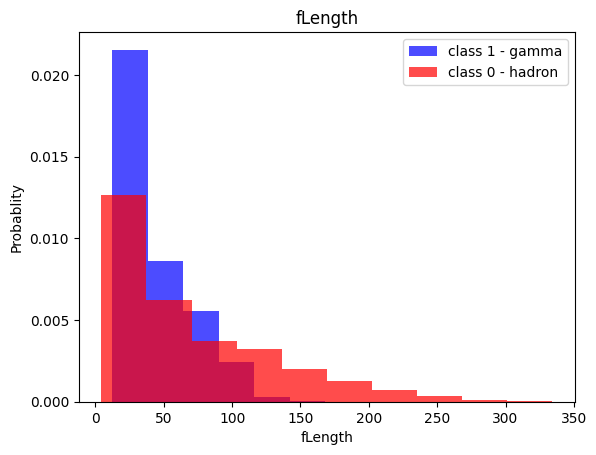

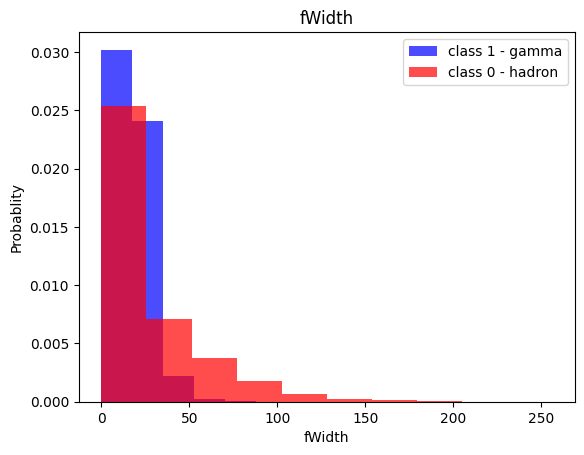

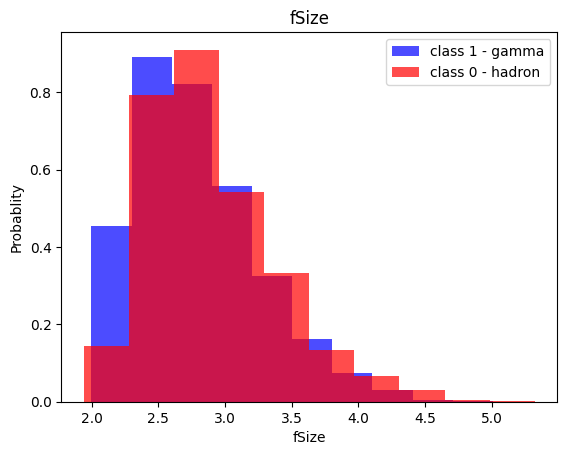

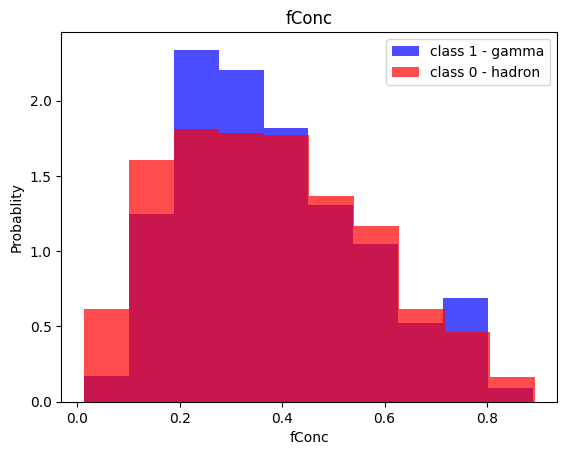

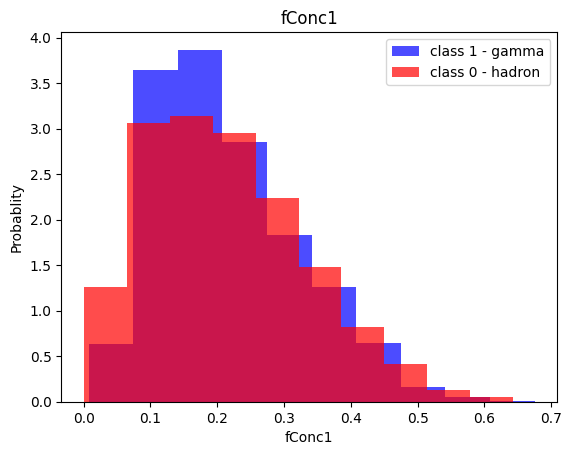

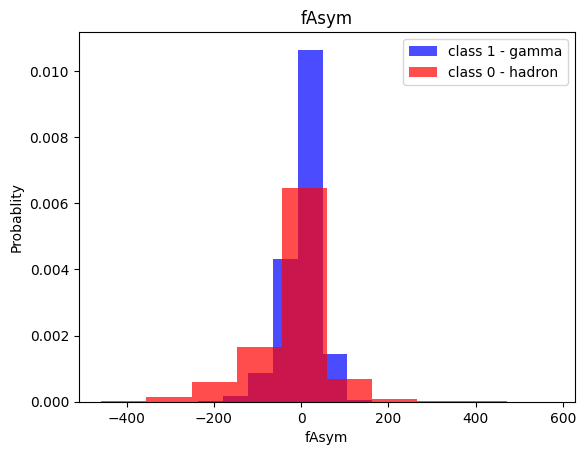

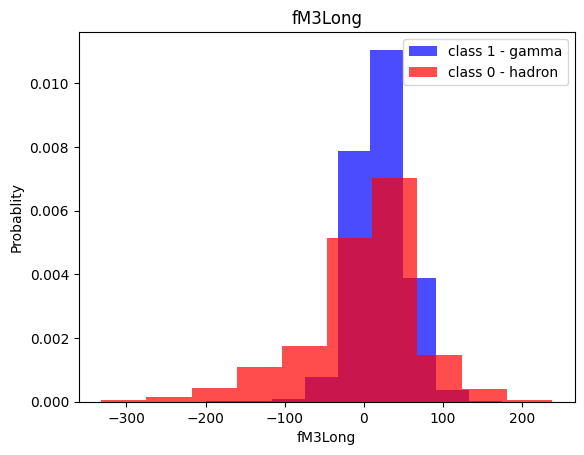

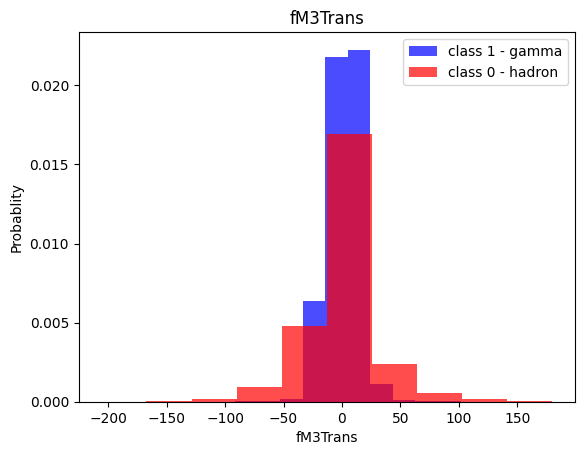

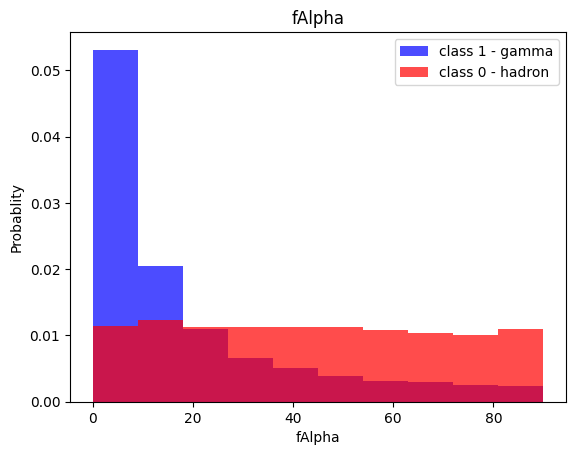

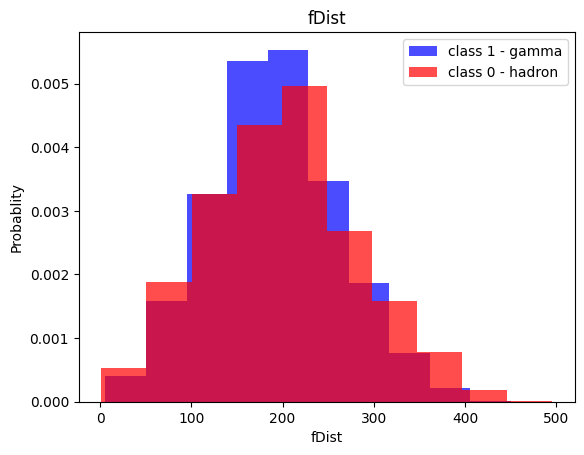

In [22]:
for column in data.columns[:-1]:
    plt.hist(data[data["class"] == 1][column], color="blue",
             alpha=0.7, label="class 1 - gamma", density=True)
    plt.hist(data[data["class"] == 0][column], color="red",
             alpha=0.7, label="class 0 - hadron", density=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel("Probablity")
    plt.legend()
    plt.show()

In [23]:
train, valid, test = np.split(data.sample(
    frac=1), [int(0.6*len(data)), int(0.8*len(data))])

In [24]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [25]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

# KNNs - K - Nearest Neighbours

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [27]:
y_pred = knn_model.predict(x_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1350
           1       0.87      0.84      0.85      2454

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.81      0.81      3804



# Naive Bayes

In [29]:
nb_model = GaussianNB()

nb_model = nb_model.fit(x_train, y_train)

In [30]:
y_pred = nb_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1350
           1       0.73      0.90      0.81      2454

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



# Logistic Regression

In [31]:
lg_model = LogisticRegression()

lg_model = lg_model.fit(x_train, y_train)

In [32]:
y_pred = lg_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1350
           1       0.84      0.82      0.83      2454

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVMs - Support Vecor Machines

In [33]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [34]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1350
           1       0.89      0.90      0.89      2454

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [36]:
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                 loss="binary_crossentropy", metrics=["accuracy"])

In [37]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [38]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                     metrics=['accuracy'])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=valid, verbose=0
    )

    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


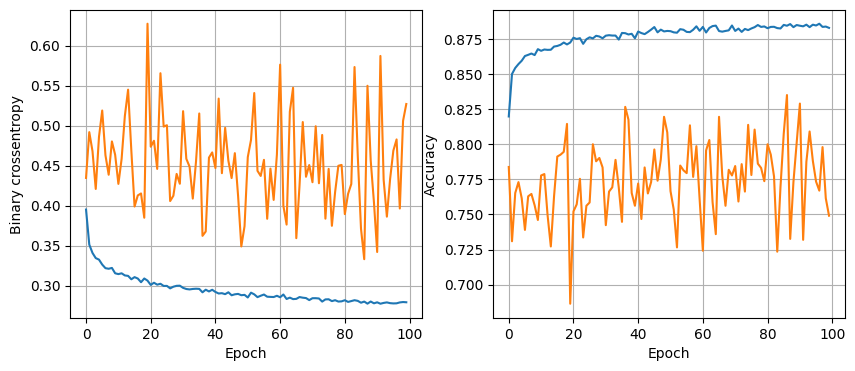

119/119 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.8649
16 nodes, dropout 0, lr 0.01, batch size 64


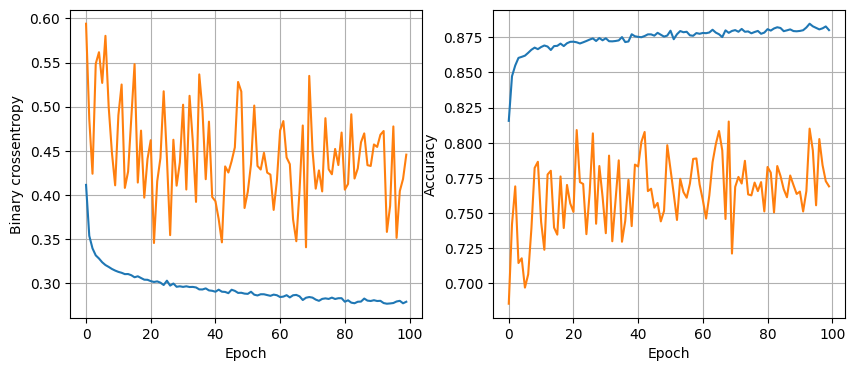

119/119 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8599
16 nodes, dropout 0, lr 0.01, batch size 128


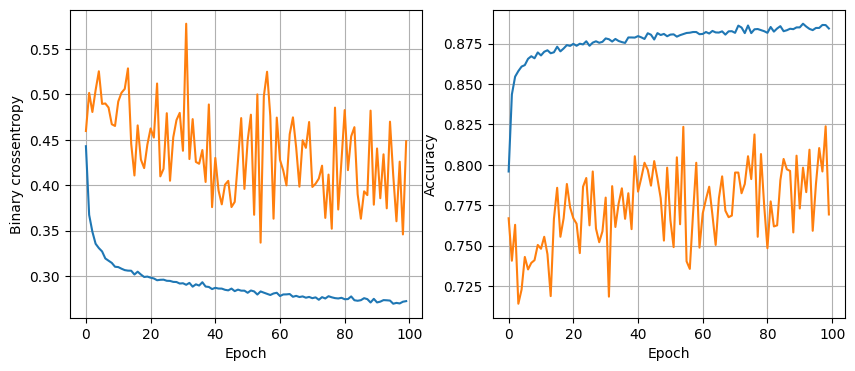

119/119 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.005, batch size 32


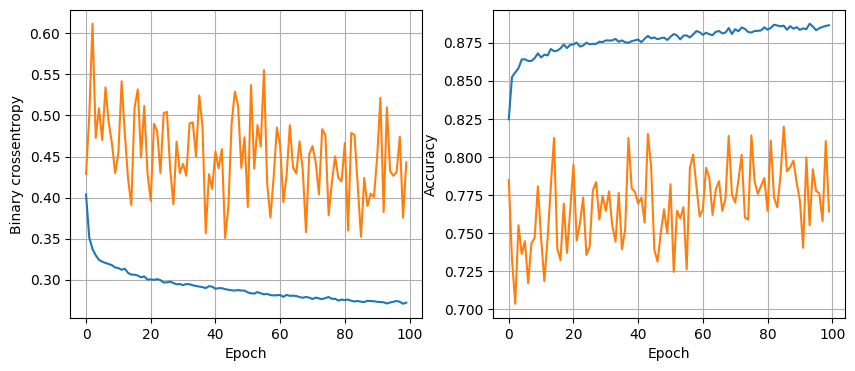

119/119 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8625
16 nodes, dropout 0, lr 0.005, batch size 64


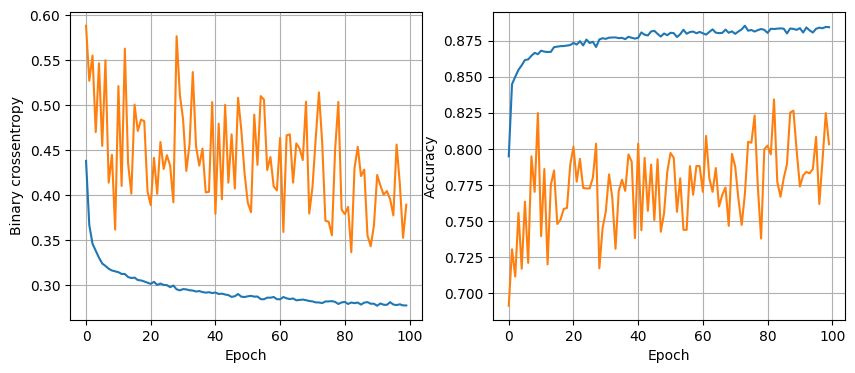

119/119 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8701
16 nodes, dropout 0, lr 0.005, batch size 128


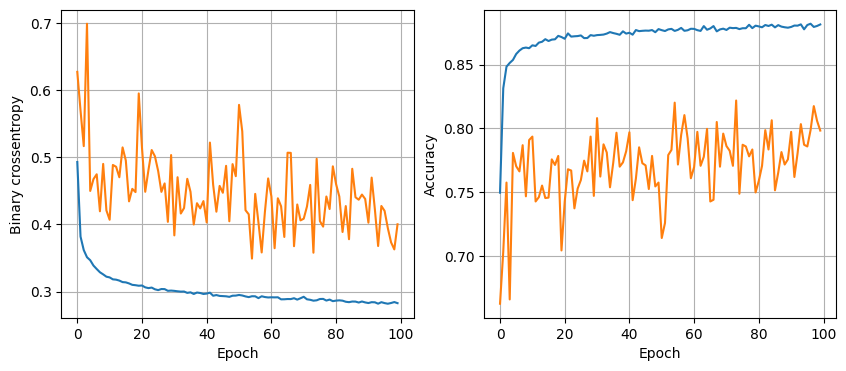

119/119 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8630
16 nodes, dropout 0, lr 0.001, batch size 32


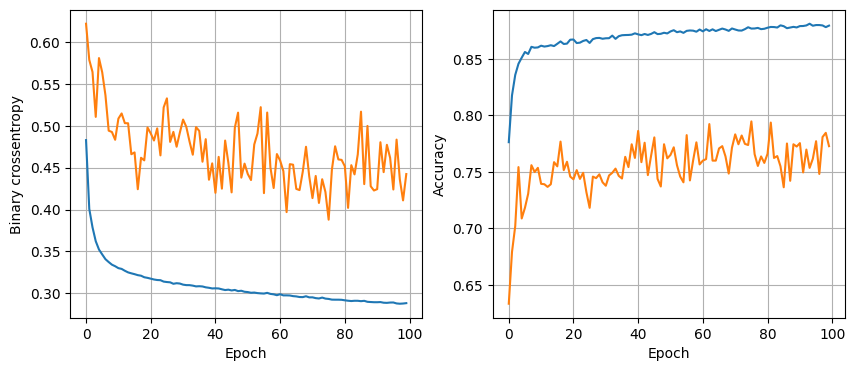

119/119 [==============================] - 1s 5ms/step - loss: 0.3114 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.001, batch size 64


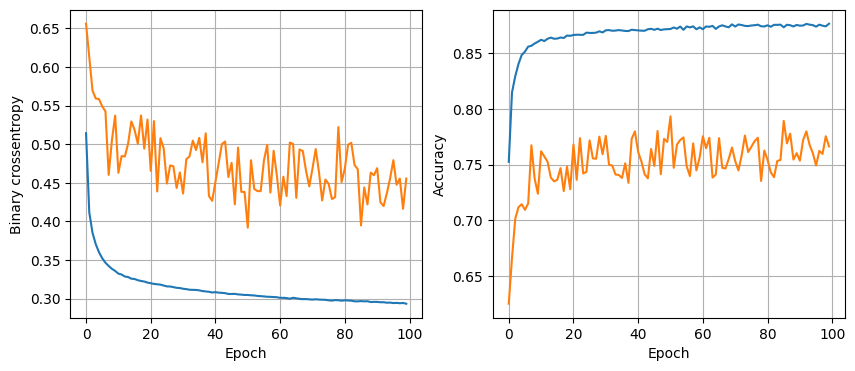

119/119 [==============================] - 1s 3ms/step - loss: 0.3168 - accuracy: 0.8670
16 nodes, dropout 0, lr 0.001, batch size 128


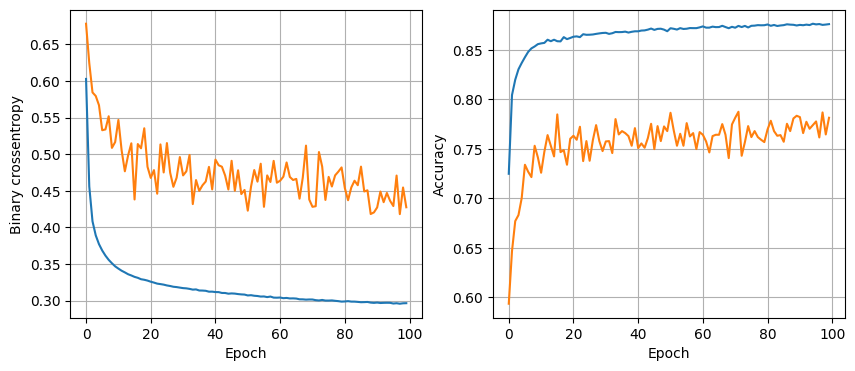

119/119 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.8709
16 nodes, dropout 0.2, lr 0.01, batch size 32


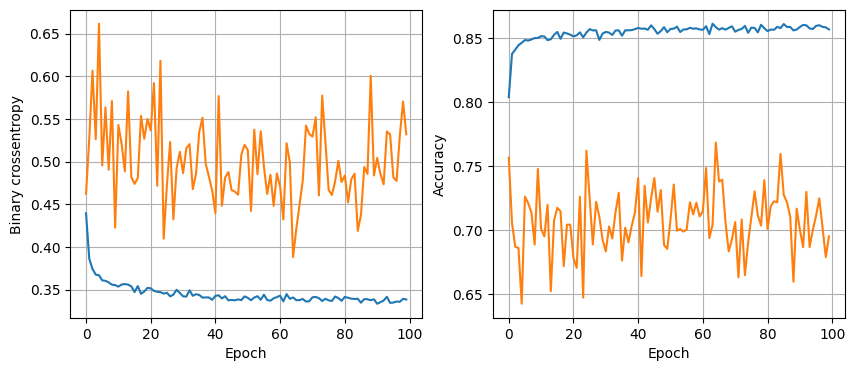

119/119 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8601
16 nodes, dropout 0.2, lr 0.01, batch size 64


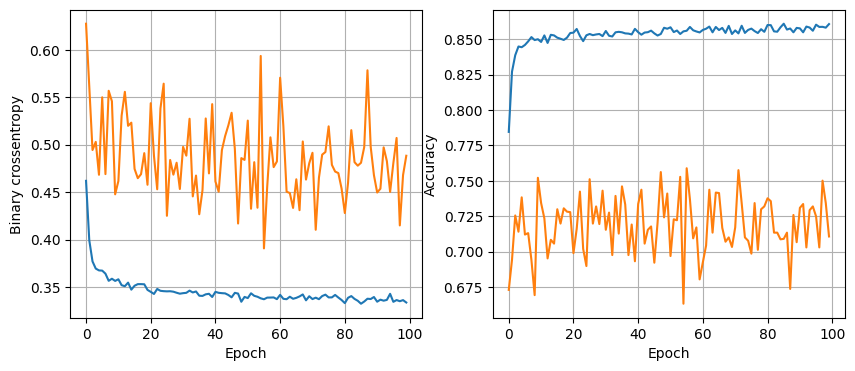

119/119 [==============================] - 0s 3ms/step - loss: 0.3248 - accuracy: 0.8636
16 nodes, dropout 0.2, lr 0.01, batch size 128


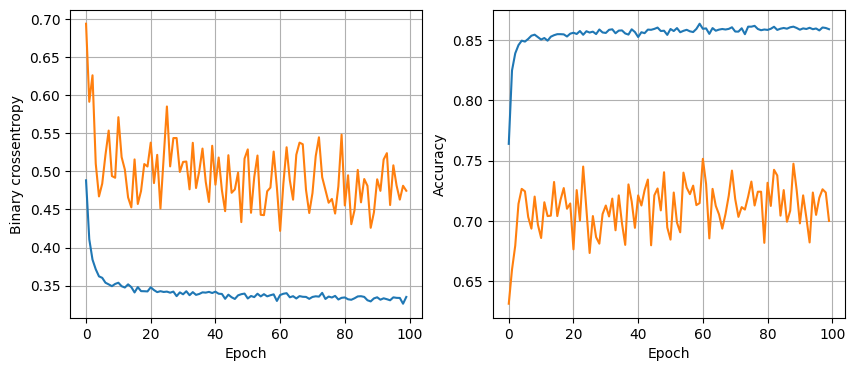

119/119 [==============================] - 0s 3ms/step - loss: 0.3205 - accuracy: 0.8641
16 nodes, dropout 0.2, lr 0.005, batch size 32


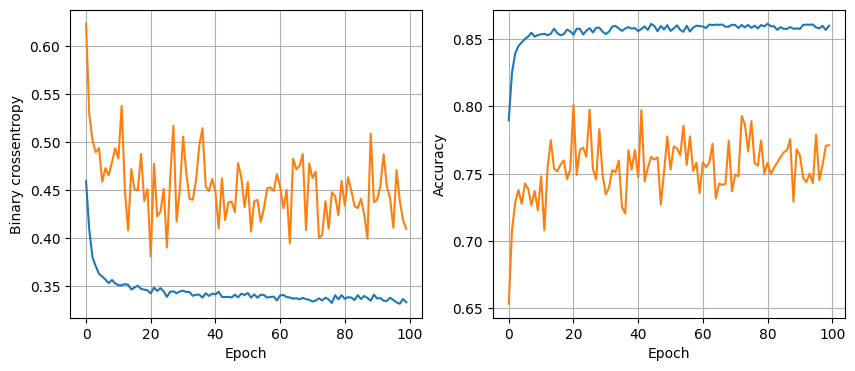

119/119 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8636
16 nodes, dropout 0.2, lr 0.005, batch size 64


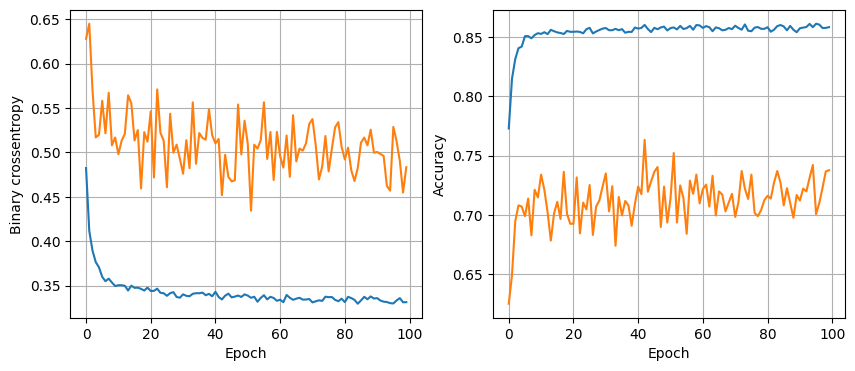

119/119 [==============================] - 0s 3ms/step - loss: 0.3173 - accuracy: 0.8670
16 nodes, dropout 0.2, lr 0.005, batch size 128


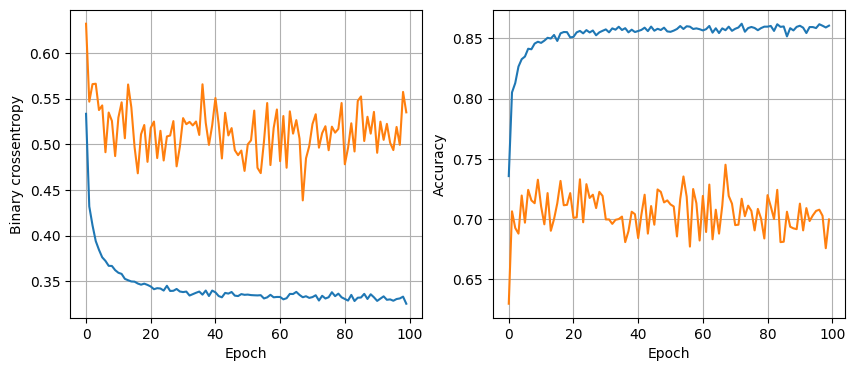

119/119 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8623
16 nodes, dropout 0.2, lr 0.001, batch size 32


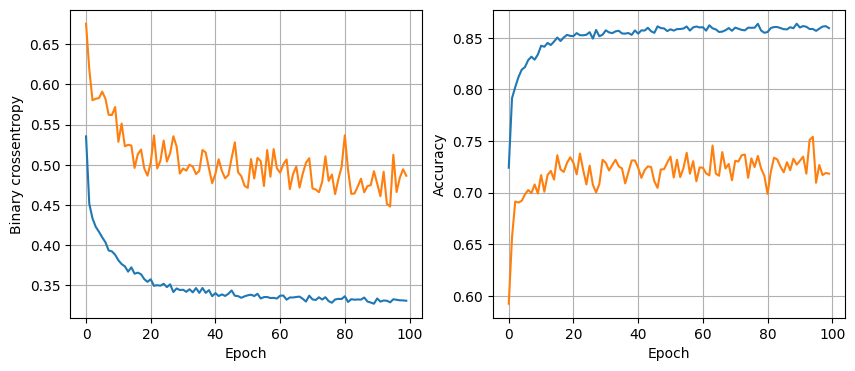

119/119 [==============================] - 0s 3ms/step - loss: 0.3167 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.001, batch size 64


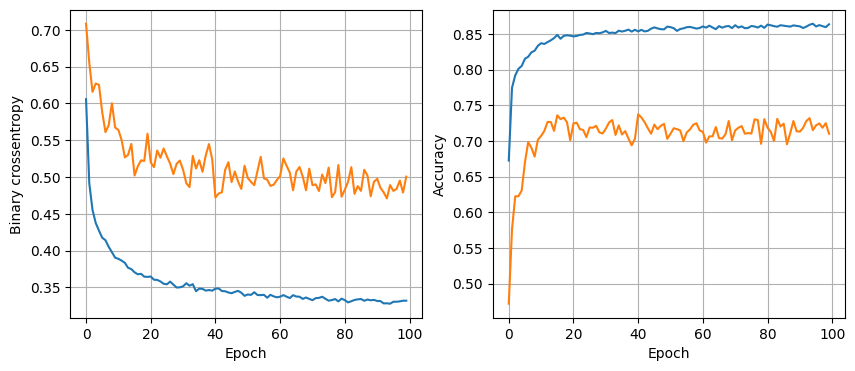

119/119 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8636
16 nodes, dropout 0.2, lr 0.001, batch size 128


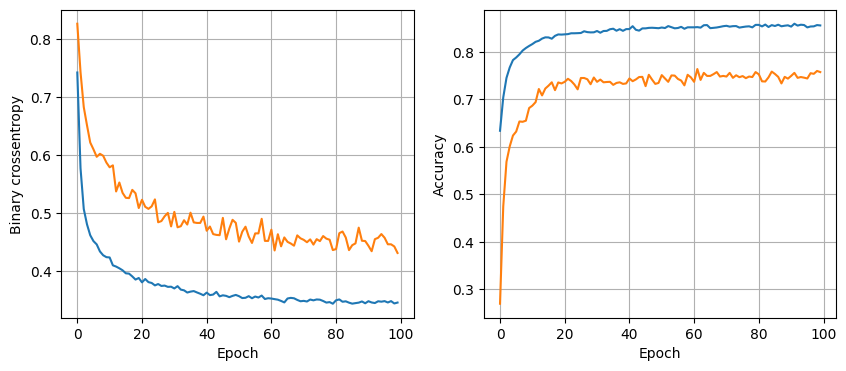

119/119 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8667
32 nodes, dropout 0, lr 0.01, batch size 32


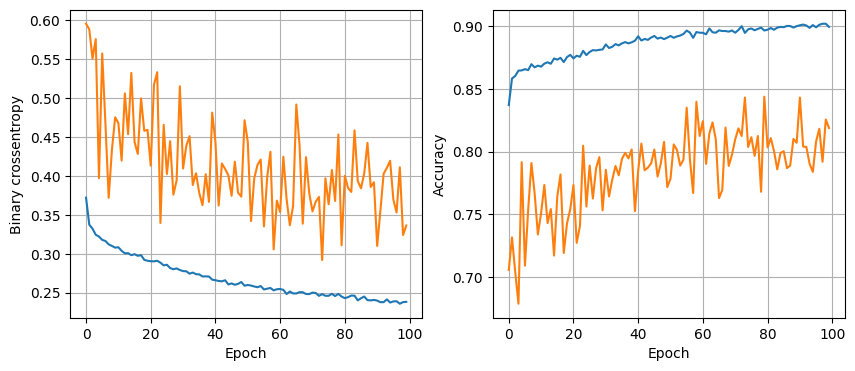

119/119 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.8617
32 nodes, dropout 0, lr 0.01, batch size 64


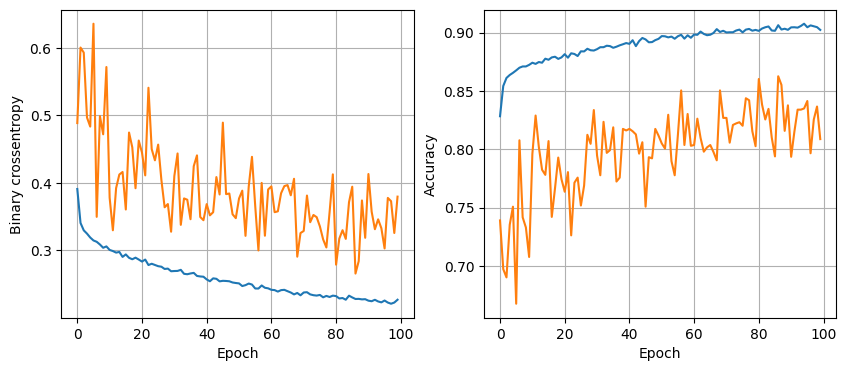

119/119 [==============================] - 0s 1ms/step - loss: 0.3897 - accuracy: 0.8646
32 nodes, dropout 0, lr 0.01, batch size 128


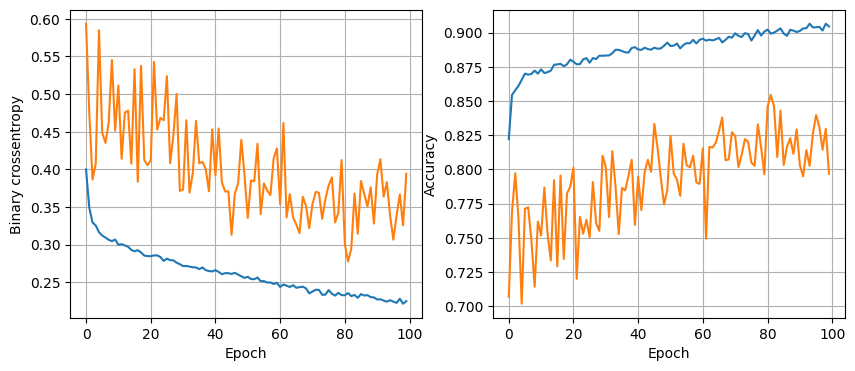

119/119 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8636
32 nodes, dropout 0, lr 0.005, batch size 32


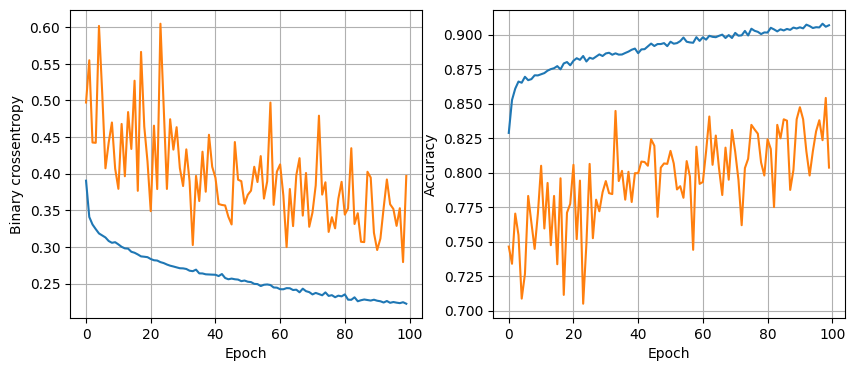

119/119 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8586
32 nodes, dropout 0, lr 0.005, batch size 64


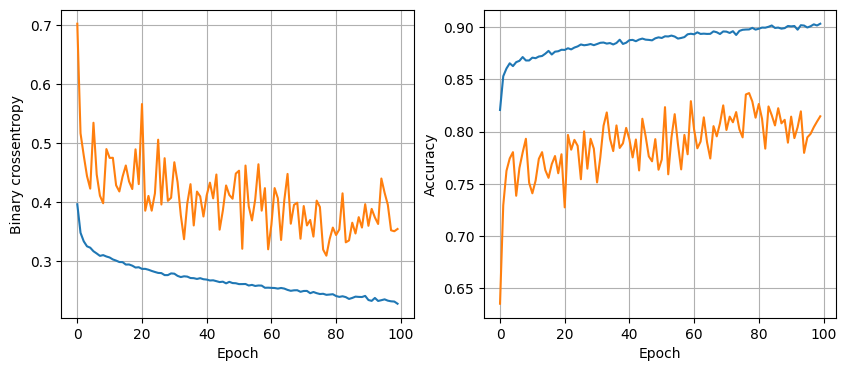

119/119 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8623
32 nodes, dropout 0, lr 0.005, batch size 128


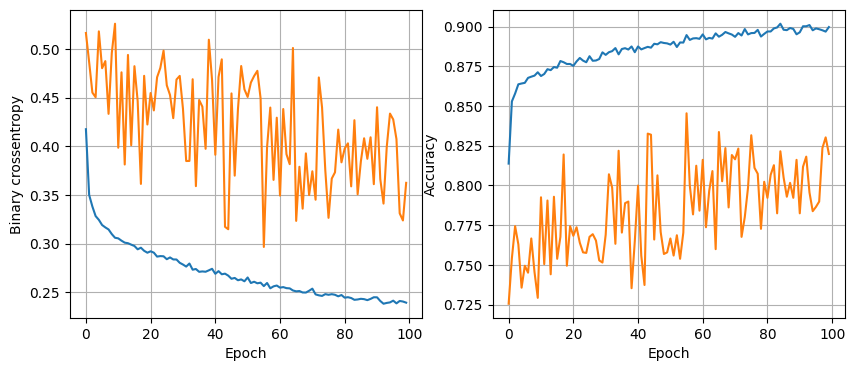

119/119 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.8675
32 nodes, dropout 0, lr 0.001, batch size 32


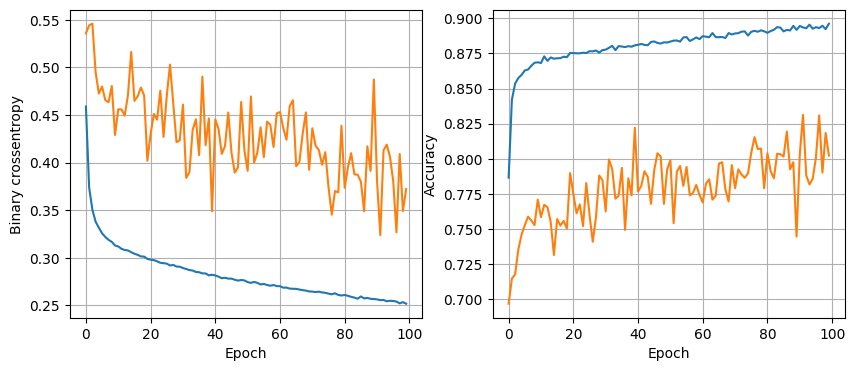

119/119 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8638
32 nodes, dropout 0, lr 0.001, batch size 64


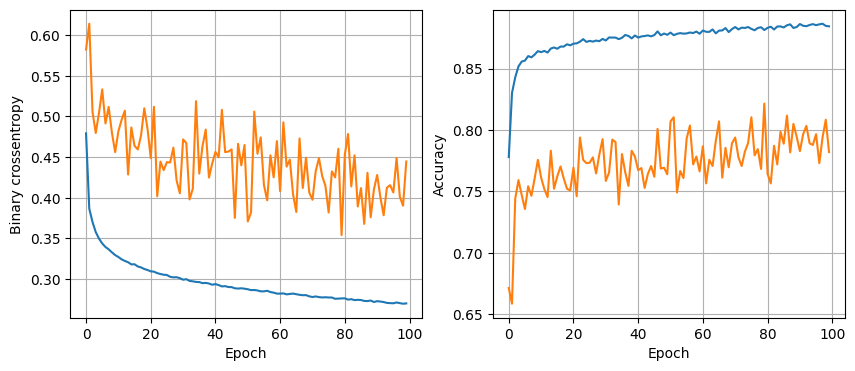

119/119 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.001, batch size 128


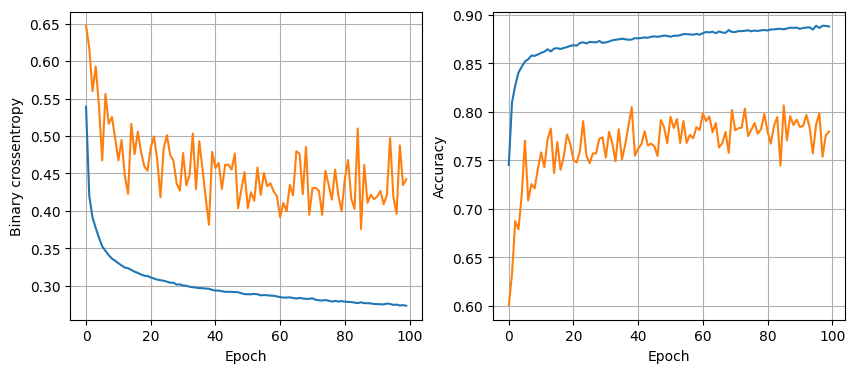

119/119 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8601
32 nodes, dropout 0.2, lr 0.01, batch size 32


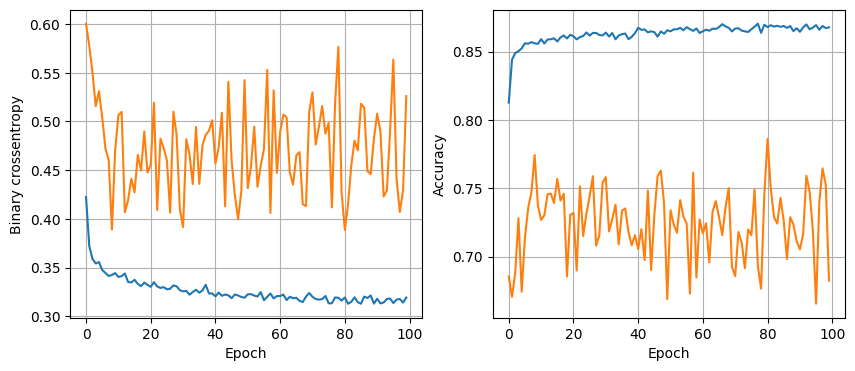

119/119 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8591
32 nodes, dropout 0.2, lr 0.01, batch size 64


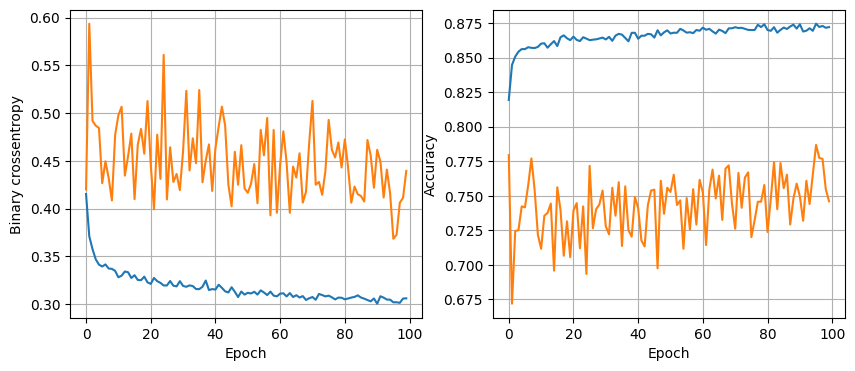

119/119 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.8751
32 nodes, dropout 0.2, lr 0.01, batch size 128


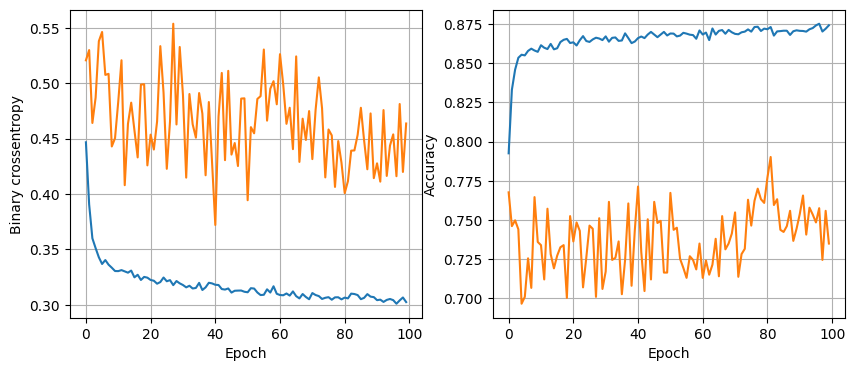

119/119 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.005, batch size 32


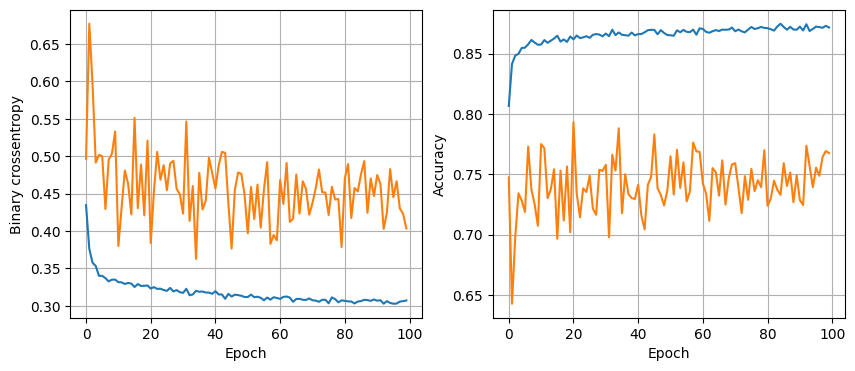

119/119 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8738
32 nodes, dropout 0.2, lr 0.005, batch size 64


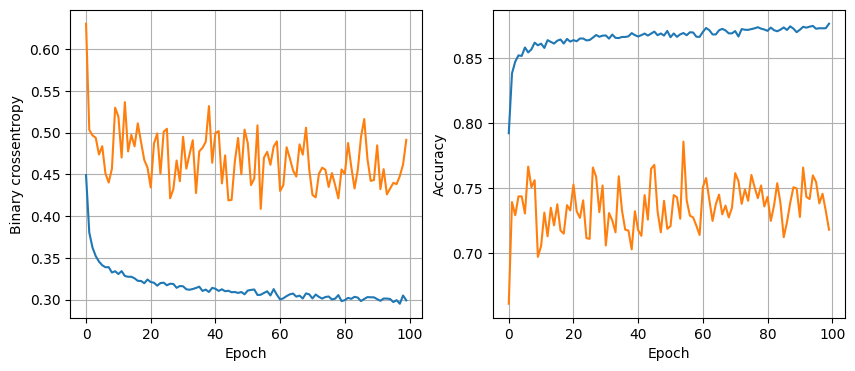

119/119 [==============================] - 0s 1ms/step - loss: 0.3076 - accuracy: 0.8691
32 nodes, dropout 0.2, lr 0.005, batch size 128


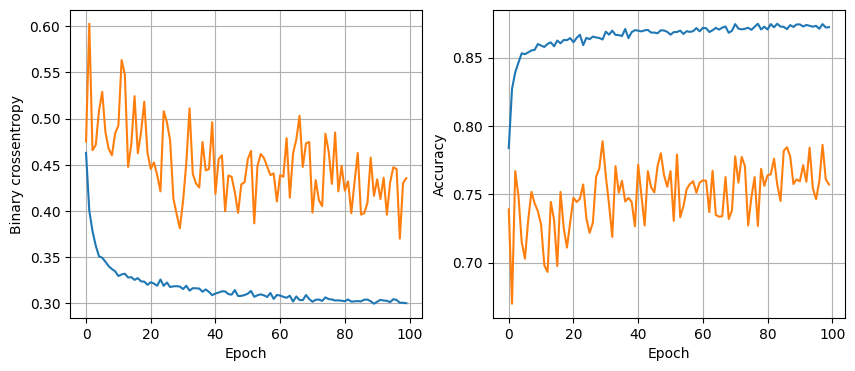

119/119 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8693
32 nodes, dropout 0.2, lr 0.001, batch size 32


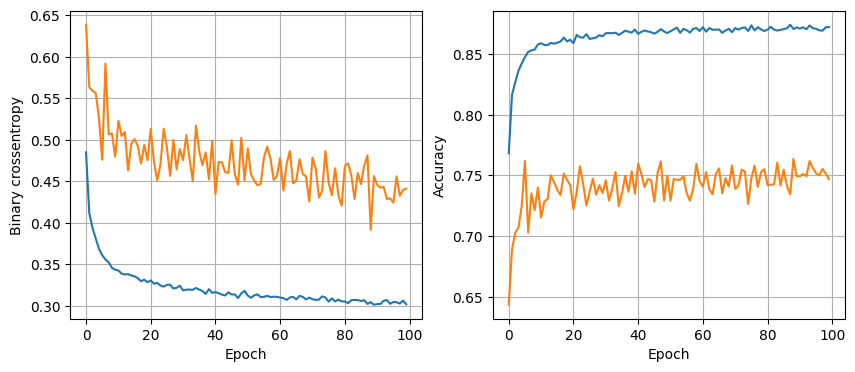

119/119 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.001, batch size 64


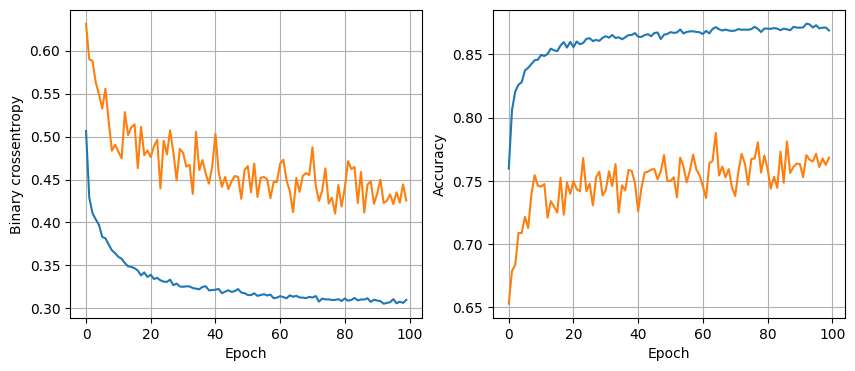

119/119 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.001, batch size 128


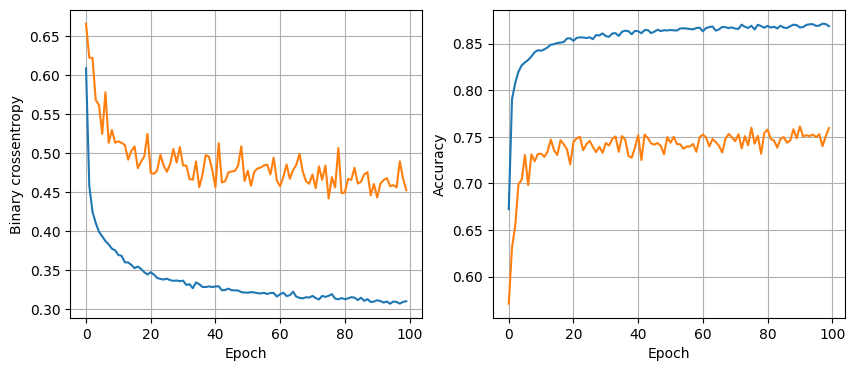

119/119 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8680
64 nodes, dropout 0, lr 0.01, batch size 32


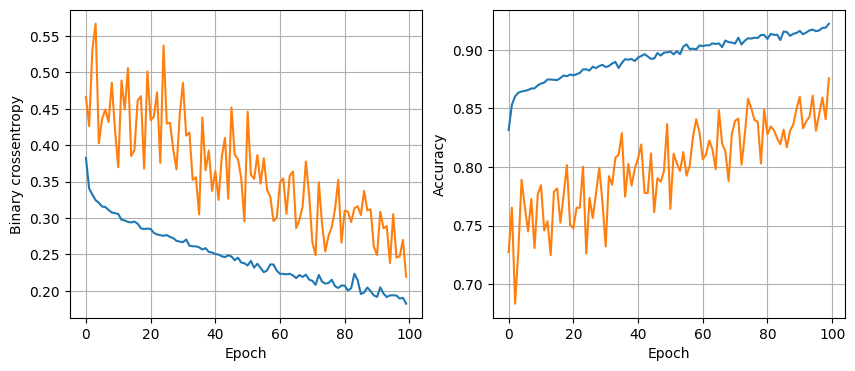

119/119 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.8570
64 nodes, dropout 0, lr 0.01, batch size 64


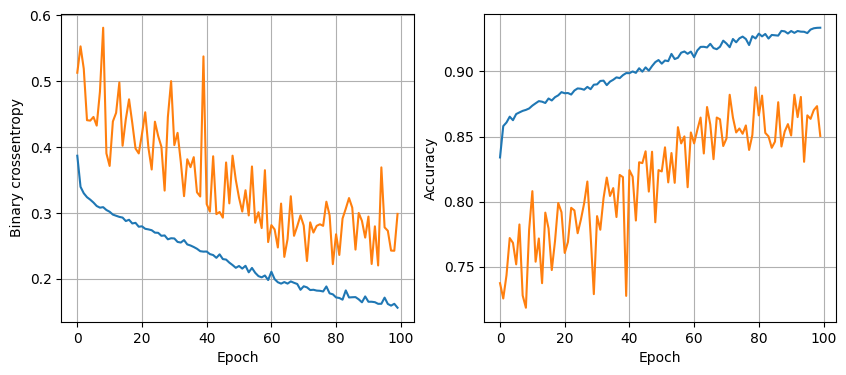

119/119 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.8538
64 nodes, dropout 0, lr 0.01, batch size 128


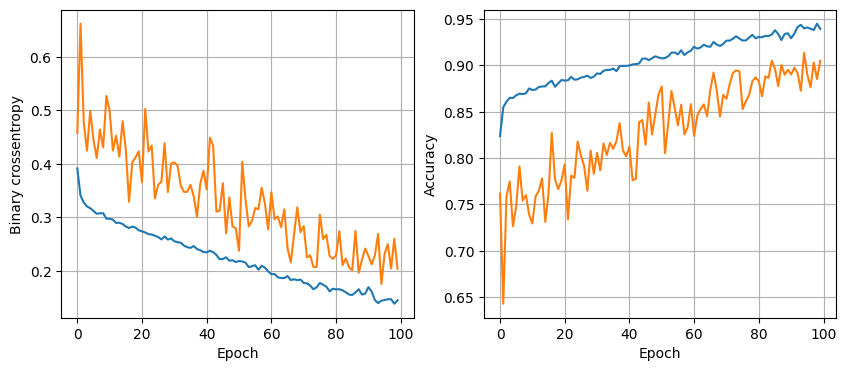

119/119 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.8541
64 nodes, dropout 0, lr 0.005, batch size 32


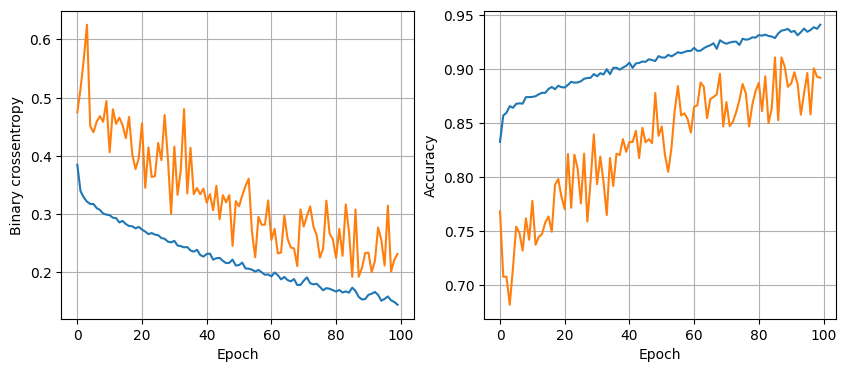

119/119 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.8502
64 nodes, dropout 0, lr 0.005, batch size 64


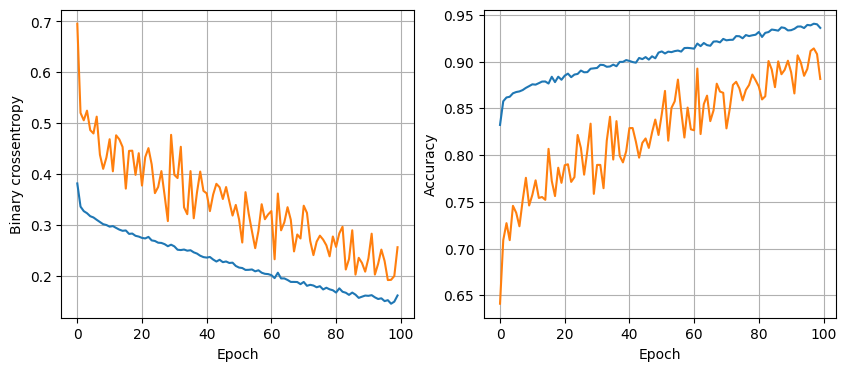

119/119 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.8512
64 nodes, dropout 0, lr 0.005, batch size 128


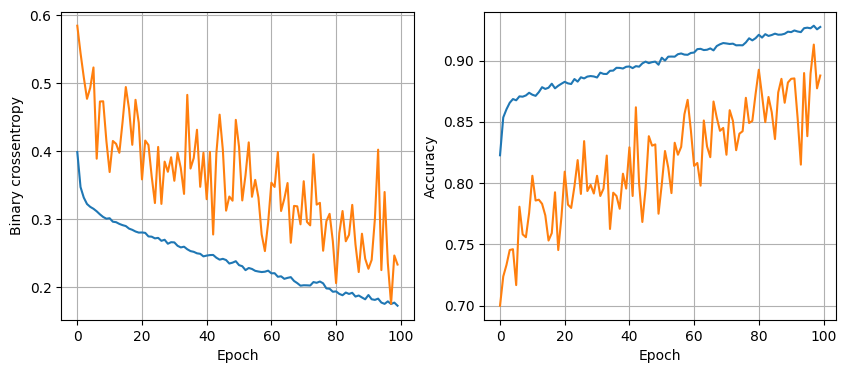

119/119 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.8517
64 nodes, dropout 0, lr 0.001, batch size 32


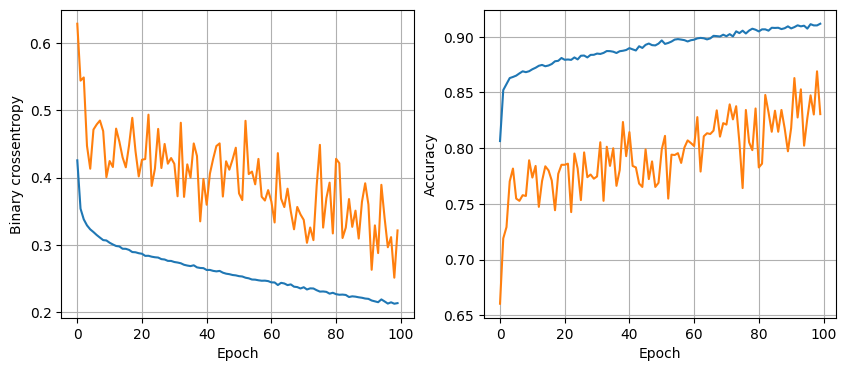

119/119 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8638
64 nodes, dropout 0, lr 0.001, batch size 64


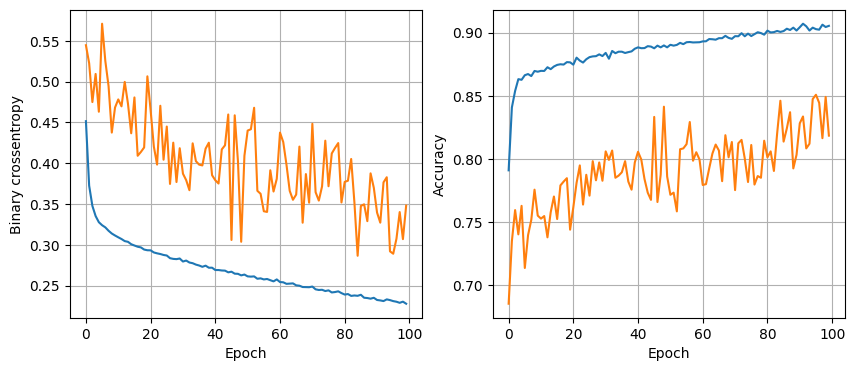

119/119 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8667
64 nodes, dropout 0, lr 0.001, batch size 128


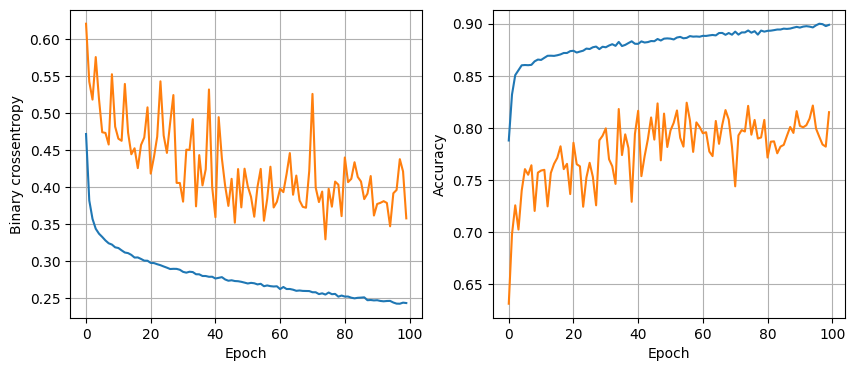

119/119 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8675
64 nodes, dropout 0.2, lr 0.01, batch size 32


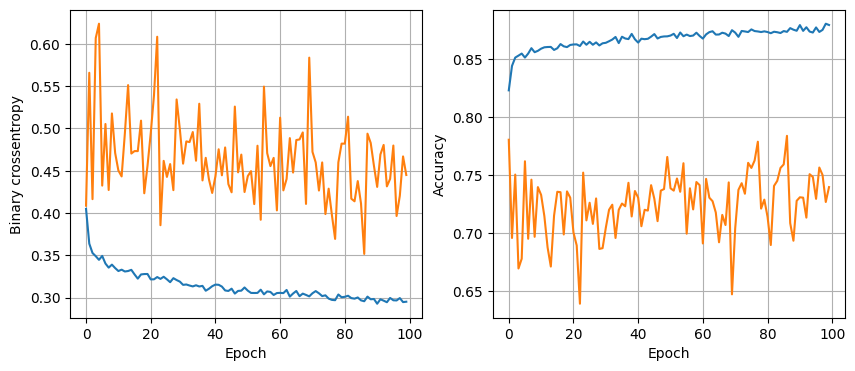

119/119 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.01, batch size 64


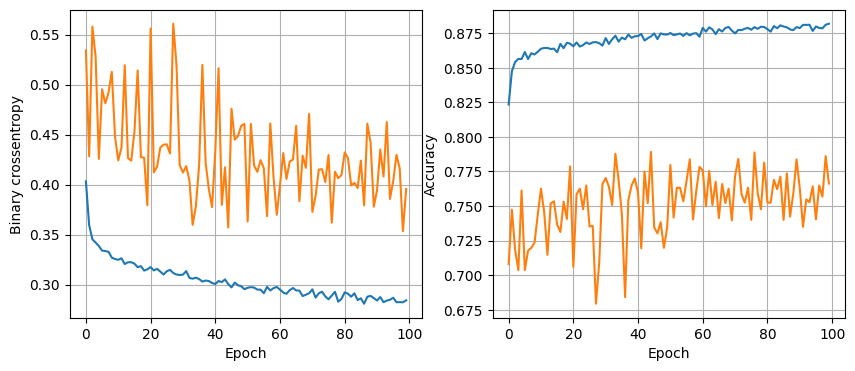

119/119 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8764
64 nodes, dropout 0.2, lr 0.01, batch size 128


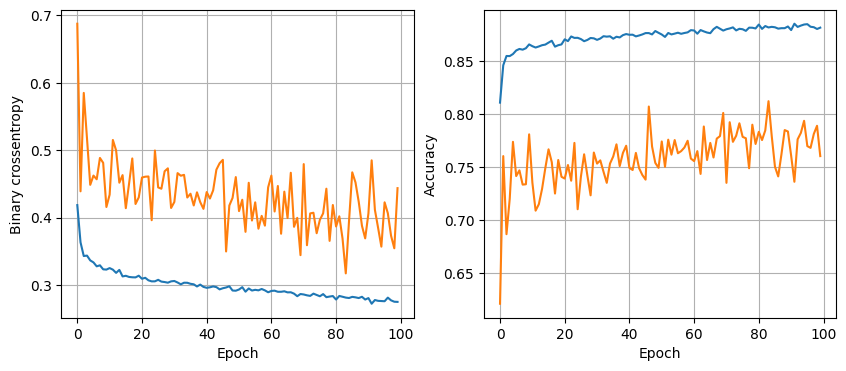

119/119 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8709
64 nodes, dropout 0.2, lr 0.005, batch size 32


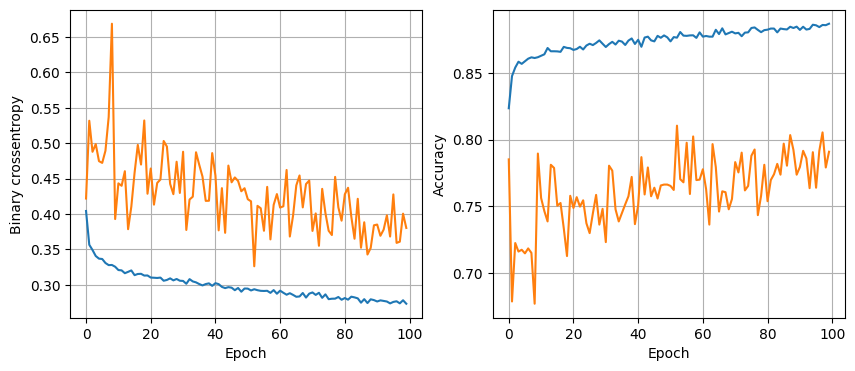

119/119 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8767
64 nodes, dropout 0.2, lr 0.005, batch size 64


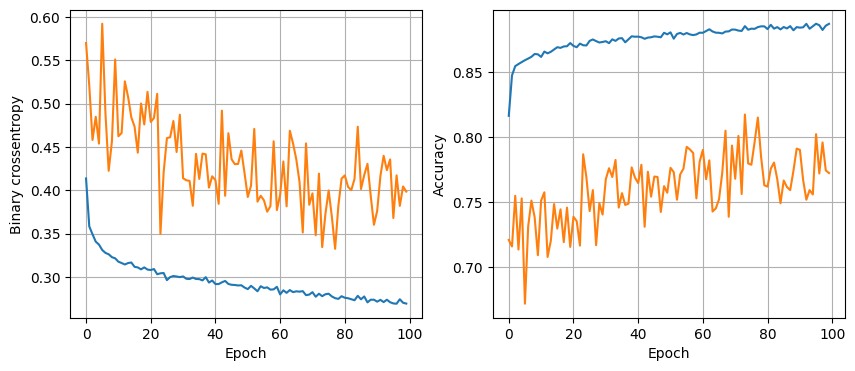

119/119 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.8725
64 nodes, dropout 0.2, lr 0.005, batch size 128


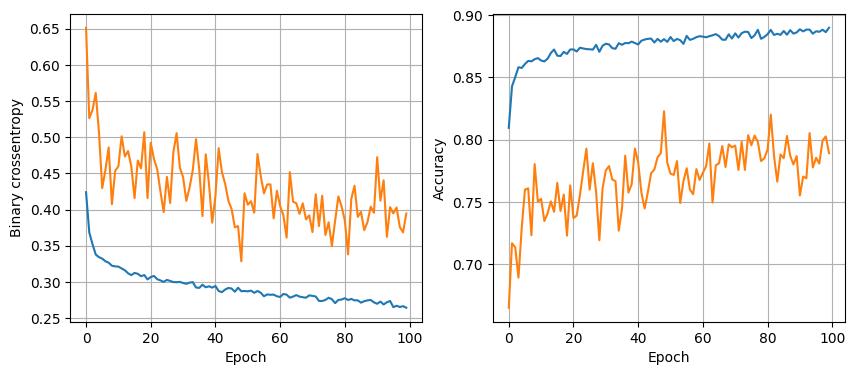

119/119 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8720
64 nodes, dropout 0.2, lr 0.001, batch size 32


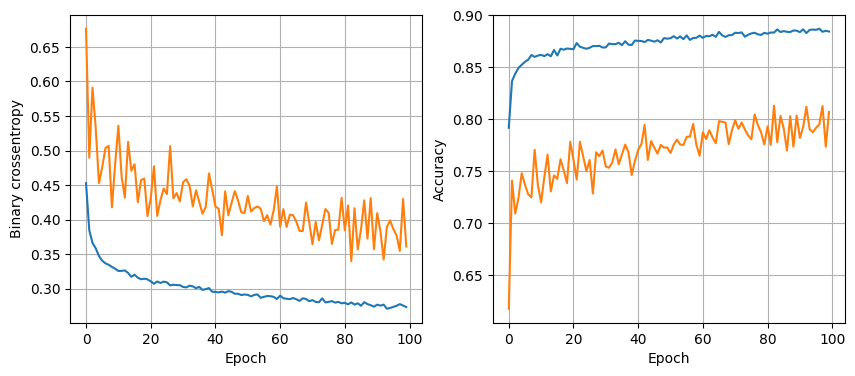

119/119 [==============================] - 0s 1ms/step - loss: 0.2976 - accuracy: 0.8778
64 nodes, dropout 0.2, lr 0.001, batch size 64


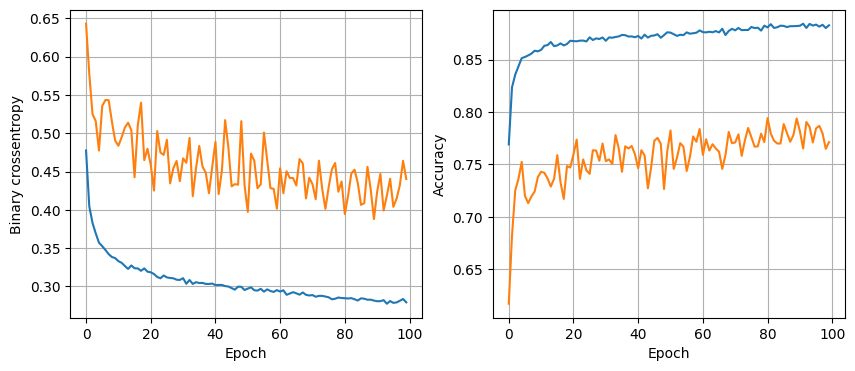

119/119 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.8749
64 nodes, dropout 0.2, lr 0.001, batch size 128


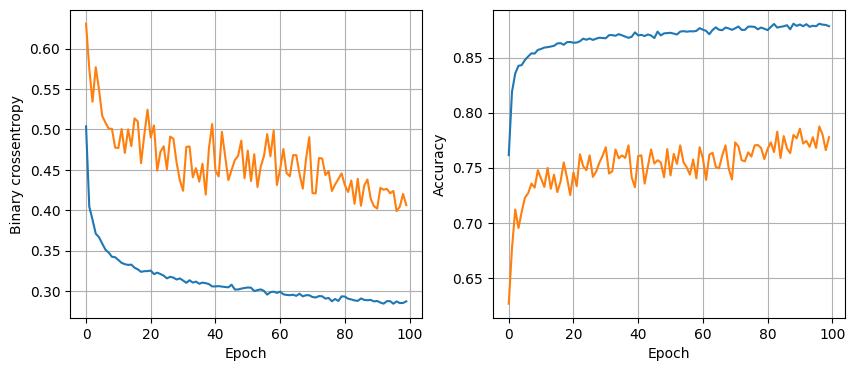

119/119 [==============================] - 0s 1ms/step - loss: 0.3001 - accuracy: 0.8725


In [41]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:

    for dropout_prob in [0, 0.2]:

        for lr in [0.01, 0.005, 0.001]:

            for batch_size in [32, 64, 128]:

                print(
                    f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")

                model, history = train_model(
                    x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)

                plot_history(history)

                val_loss = model.evaluate(x_valid, y_valid)[0]

                if val_loss < least_val_loss:

                    least_val_loss = val_loss
                    least_loss_model = model

In [42]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1350
           1       0.88      0.94      0.91      2454

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804

